In [1]:
# To get multi output in jupyternotebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# The output of sklearn is numpyarray.We can set it to pandas.
from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("boston.csv")
x=data.drop('MEDV',axis=1)
y=data[['MEDV']]

In [5]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
X_train.iloc[22]

CRIM         2.37857
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.58300
RM           5.87100
AGE         41.90000
DIS          3.72400
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          370.73000
LSTAT       13.34000
Name: 484, dtype: float64

### Local Outlier Detection

D:\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
D:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
D:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: >

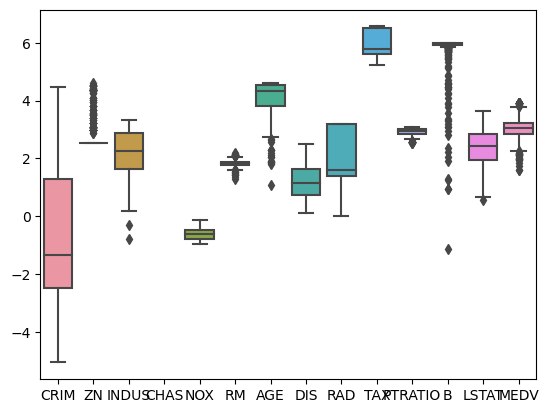

In [9]:
sns.boxplot(data=np.log(data))

In [10]:
from sklearn.neighbors import LocalOutlierFactor
outlier_LOF = LocalOutlierFactor()

In [11]:
outlier_LOF_index= np.where(outlier_LOF.fit_predict(X_train)==-1)
X_train_non_LOF = X_train[outlier_LOF.fit_predict(X_train) == 1]

In [12]:
outlier_LOF_index

(array([ 22,  26,  28,  45,  49,  52,  56,  57,  68,  71,  74,  83,  97,
        103, 113, 119, 120, 122, 134, 145, 146, 175, 186, 192, 193, 215,
        263, 266, 267, 289, 298, 301, 305, 308, 312, 321, 323, 327, 328,
        330, 332], dtype=int64),)

In [13]:
X_train.iloc[22]

CRIM         2.37857
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.58300
RM           5.87100
AGE         41.90000
DIS          3.72400
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          370.73000
LSTAT       13.34000
Name: 484, dtype: float64

In [59]:
X_scores=outlier_LOF.negative_outlier_factor_
X_scores.min()
X_scores.max()

-4.762974512772802

-0.9507423943078137

In [27]:
X_train.shape
y_train.shape

(354, 13)

(354, 1)

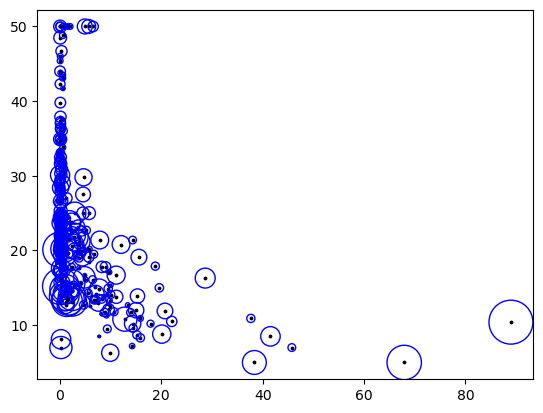

In [60]:
plt.scatter(X_train['CRIM'],y_train['MEDV'],color="k", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X_train['CRIM'],
    y_train['MEDV'],
    s=1000 * radius,
    edgecolors="blue",
    facecolors="none",
    label="Outlier scores",
)

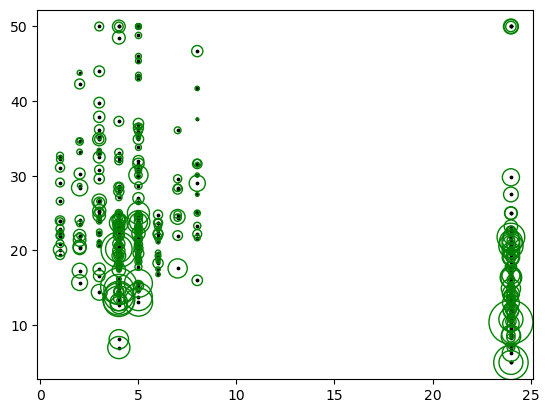

In [63]:
plt.scatter(X_train['RAD'],y_train['MEDV'],color="k", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X_train['RAD'],
    y_train['MEDV'],
    s=1000 * radius,
    edgecolors="green",
    facecolors="none",
    label="Outlier scores",
)

In [69]:
from sklearn.decomposition import PCA

reduction=PCA(n_components=2)
X_train_pca=reduction.fit_transform(X_train)
X_train_pca

,pca0,pca1
141,28.496312,-43.849907
272,-182.330673,11.347610
135,28.489747,-41.863175
298,-51.448908,3.772947
122,-207.354549,36.293186
...,...,...
323,-117.417793,-0.958749
192,-16.836538,-27.832724
117,22.004816,-40.433288
47,-168.810736,10.995456


In [93]:
from sklearn.ensemble import IsolationForest

outlier_isolation=IsolationForest(contamination=0.05)
outlier_ISO_index = outlier_isolation.fit_predict(X_train_pca)
outlier_ISO_index
len(outlier_ISO_index)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

354

Text(0.5, 0, 'Outliers Number: 18')

Text(0.5, 1.0, 'Isolation Forest')

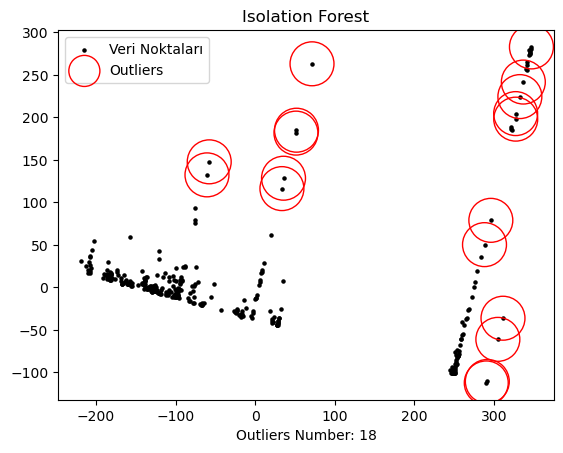

In [94]:
plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], color="k", s=5, label="Veri Noktaları")
plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], s=1000 * (outlier_ISO_index == -1), edgecolors="r", facecolors="none", label="Outliers")
plt.xlabel(f"Outliers Number: {np.sum(outlier_ISO_index == -1)}")
plt.legend()
plt.title("Isolation Forest")
plt.show()

In [88]:
outlier_ISO = IsolationForest(random_state = 0)

outlier_ISO_index = np.where(outlier_ISO.fit_predict(X_train)==-1)
X_train_non_ISO = X_train[outlier_ISO.fit_predict(X_train) == 1]
X_train_ISO = X_train[outlier_ISO.fit_predict(X_train) == -1]

outlier_ISO_index
X_train_non_ISO

len(X_train_ISO) #Number of outliers
print(f'Original train data shape {X_train.shape}')
print(f'The train data which not include outlier {X_train_non_ISO.shape}')

(array([  0,   8,  21,  29,  47,  51,  52,  59,  69,  71,  72,  73,  88,
         95,  96,  98, 100, 107, 110, 115, 122, 126, 128, 130, 136, 140,
        148, 155, 164, 175, 182, 186, 189, 192, 193, 212, 217, 234, 250,
        251, 254, 267, 272, 277, 284, 295, 296, 299, 310, 312, 319, 323,
        330, 343, 344], dtype=int64),)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


55

Original train data shape (354, 13)
The train data which not include outlier (299, 13)


In [91]:
ortak_outlier_index = np.intersect1d(outlier_LOF_index, outlier_ISO_index)
ortak_outlier_index

array([ 52,  71, 122, 175, 186, 192, 193, 267, 312, 323, 330], dtype=int64)

In [92]:
pd.merge(X_train_non_ISO,X_train_non_LOF, how='inner' )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
1,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
2,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
3,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
4,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
265,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
266,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
267,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


<Axes: >

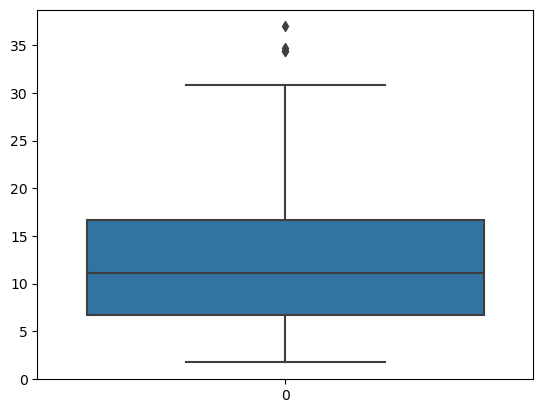

In [95]:
sns.boxplot(X_train['LSTAT'])

In [96]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='gaussian', tail='both', variables=['LSTAT'])

winsorizer.fit(X_train)
X_train_winsor=winsorizer.transform(X_train)

Winsorizer(tail='both', variables=['LSTAT'])

In [98]:
print(f"Upper Bounds {winsorizer.right_tail_caps_} \nLower Bounds {winsorizer.left_tail_caps_}")

Upper Bounds {'LSTAT': 33.64609030731523} 
Lower Bounds {'LSTAT': -8.764790872286973}


<Axes: >

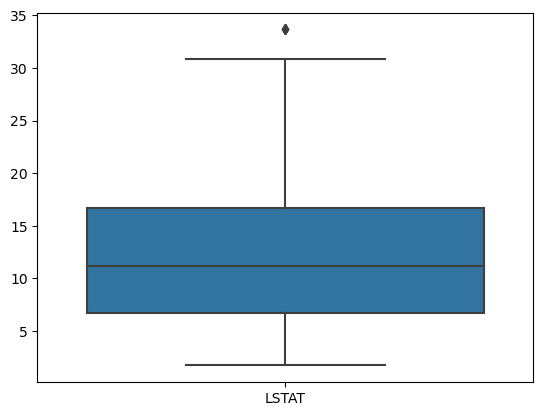

In [99]:
sns.boxplot(X_train_winsor[['LSTAT']])

In [100]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [101]:
ransac = LinearRegression()
model = ransac.fit(X_train, y_train.to_numpy().flatten())
model.score(X_test, y_test.to_numpy().flatten())

0.6733825506400184

In [102]:
# outlier olanlara agirlik atamasi yapabilirz.
outlier_weights = [1 if not o else 0.05 for o in outlier_ISO.fit_predict(X_train)==-1]

# Outlier olanlara agirlik atamasi ile yonetebiliriz.
model = LinearRegression()
model.fit(X_train, y_train.to_numpy().flatten(), sample_weight=outlier_weights)
model.score(X_test, y_test.to_numpy().flatten())

LinearRegression()

0.652412051767136

In [103]:
# Theil-Sen robust regression
theil = TheilSenRegressor()
model = theil.fit(X_train, y_train.to_numpy().flatten())
model.score(X_test, y_test.to_numpy().flatten())

# RANSAC robust regression
ransac = RANSACRegressor()
model = ransac.fit(X_train, y_train.to_numpy().flatten())
model.score(X_test, y_test.to_numpy().flatten())

0.5858673769845755

0.5081749777249132